Let's create a class called point with coordinates (x,y)

Now we create a constructor to create points, if coordinates are not specified by default we should start in the origin.

In [1]:
import numpy as np

class Point:
    def __init__(self,x=0, y=0):
        self.x=x
        self.y=y
        
    #def a str method to visualize the coordinates of the point that has been created    
    def __str__(self):
        return '({},{})'.format(self.x, self.y)
    
    #we also want to identify the quadrant in which the point is on the cartesian plane
    def quadrant(self):
        if self.x>0 and self.y>0:
            return 'fisrt quadrant'
        elif self.x>0 and self.y<0:
            return 'fourth quadrant'
        elif self.x<0 and self.y<0:
            return 'third quadrant'
        elif self.x<0 and self.y>0:
            return 'second quadrant'
        elif self.x==0 and self.y==0:
            return 'origin'
        else:
            return 'on an axis'
            
    #now we want to calculate the resulting vector from the created point and another given point
    def vector(self, p):
        return (p.x-self.x, p.y-self.y)
        
    #we want to calculate the distance between the created point and another given point
    def distance(self, p):
        return np.sqrt((p.x-self.x)**2+ (p.y-self.y)**2)
        

Now lets create a class called Rectangle that admits 2 points from the Point class

In [2]:
class Rectangle:
    def __init__(self, p1=Point(), p2=Point()):
        self.p1= p1
        self.p2= p2
        
    def base(self):
        return abs(self.p1.x-self.p2.x)
        
    def height(self):
        return abs(self.p1.y-self.p2.y)
        
    def area(self):
        return self.base()*self.height()
    

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_figure(figure):
    fig, ax =plt.subplots() 
    #To draw the figure on the cartesian plane we are going to use the patches package
    #Patches need the inferior left corner of the rectangle in order to draw it
    
    x=min(figure.p1.x, figure.p2.x)
    y=min(figure.p1.y, figure.p2.y)
    
    xf=max(figure.p1.x, figure.p2.x)
    yf=max(figure.p1.y, figure.p2.y)
    
    width = figure.base()
    height =figure.height()
    
    rect=patches.Rectangle((x,y), width, height, facecolor='lightblue', edgecolor='b', label='Area: {} squared units\n Width: {} units\n Height: {} units'.format(figure.area(), figure.base(), figure.height()))
    
    ax.add_patch(rect)
    ax.plot(figure.p1.x, figure.p1.y, 'go')
    ax.text(figure.p1.x+0.1, figure.p1.y+0.1, '{}'.format(figure.p1))
    ax.plot(figure.p2.x, figure.p2.y, 'r*')
    ax.text(figure.p2.x+0.1, figure.p2.y+0.1, '{}'.format(figure.p2))
    plt.axhline(y=0, color='gray', linestyle='--')
    plt.axvline(x=0, color='gray', linestyle='--')
    
    margin=5
    plt.xlim(x-margin, xf+margin)
    plt.ylim(y-margin, yf+margin)
    plt.legend()
    plt.show()
    

For instance, let's create the following points:

A=(2,3)

B=(5,5)

C=(-3,-1)

D=(0,0)

In [4]:
A=Point(2,3)
B=Point(5,-5)
C=Point(-3,-1)
D=Point()

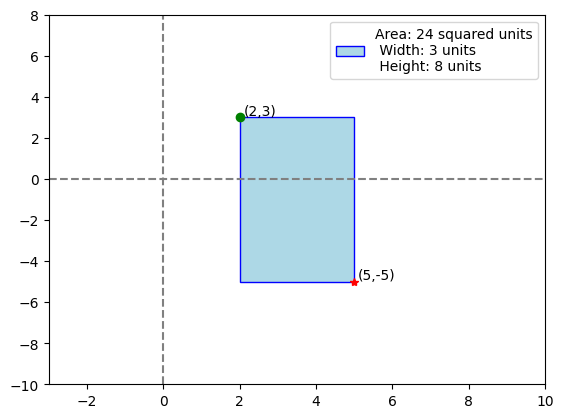

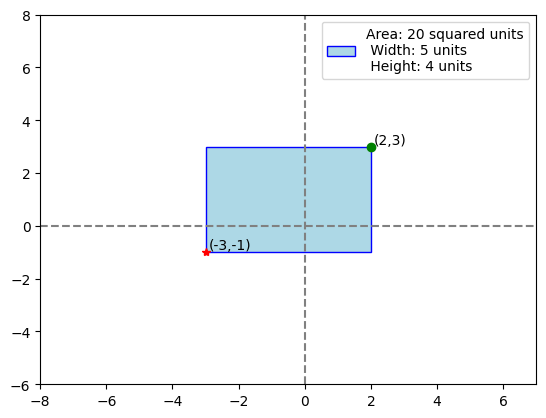

In [5]:
plot_figure(Rectangle(A,B))
plot_figure(Rectangle(A,C))

In [6]:
#We can consult our point's methods to for more info 
print('Point',A, 'is in the', A.quadrant())
print('The resulting vector from',B, 'to',A, 'is',B.vector(A))

Point (2,3) is in the fisrt quadrant
The resulting vector from (5,-5) to (2,3) is (-3, 8)


Let's extend this program to the 3D plane using class inheritance principles

In [7]:
class Point3D(Point):
    
    def __init__(self, x=0, y=0, z=0):
        super().__init__(x, y)
        self.z=z
    
    def __str__(self):
        return '({},{},{})'.format(self.x,self.y,self.z)
    
    def distance(self,p):
        d_2d=super().distance(p)
        dz=p.z-self.z
        return np.sqrt(d_2d**2+dz**2)
    
    def vector(self, p):
        v_2d=super().vector(p)
        dz=p.z-self.z
        return(*v_2d, dz)
        

And let's extend our rectangle to a prism

In [8]:
class Prism(Rectangle):
    def __init__(self, p1=Point3D(), p2=Point3D()):
        super().__init__(p1, p2)
        
    def depth(self):
        return abs(self.p1.z-self.p2.z)
        
    def volume(self):
        return self.area()*self.depth()
        

In [179]:
from itertools import product 
from mpl_toolkits.mplot3d.art3d import Poly3DCollection



def plot_prism(figure):
    #let's identify the min and max coordinates to identify all the vertices 
    x0, x1= sorted([figure.p1.x, figure.p2.x])
    y0, y1= sorted([figure.p1.y, figure.p2.y])
    z0, z1= sorted([figure.p1.z, figure.p2.z])
    
    vertices= list(product([x0,x1],[y0,y1],[z0,z1]))
    
    #Following the order of the vertices list, we crate the faces 
    faces = [
        [vertices[i] for i in [0, 4, 6, 2]],  # here we fix z = z0
        [vertices[i] for i in [1, 5, 7, 3]],  # fix z = z1
        [vertices[i] for i in [0, 1, 3, 2]],  # fix x = x0
        [vertices[i] for i in [4, 5, 7, 6]],  # fix x = x1
        [vertices[i] for i in [0, 1, 5, 4]],  # fix y = y0
        [vertices[i] for i in [2, 3, 7, 6]],  # fix y = y1
        ]
    
    fig, ax=plt.subplots(subplot_kw={"projection": "3d"})
    ax.add_collection3d(Poly3DCollection(faces, facecolor='lightpink', edgecolors='blue'))
    
    ax.scatter(figure.p1.x, figure.p1.y, figure.p1.z)
    ax.text(figure.p1.x+0.1, figure.p1.y+0.1,figure.p1.z+0.1, '{}'.format(figure.p1))
    ax.scatter(figure.p2.x, figure.p2.y, figure.p2.z)
    ax.text(figure.p2.x+0.1, figure.p2.y+0.1,figure.p2.z+0.1, '{}'.format(figure.p2))
    ax.text2D( 0.1, 0.1,'Volume: {} cubic units'.format(figure.volume()))
    
    margin=2
    ax.set_xlim([x0-margin, x1+margin])
    ax.set_ylim([y0-margin, y1+margin])
    ax.set_zlim([z0-margin, z1+margin])

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    plt.show()

For instance, let's create the following points:

E=(0,0,0)

F=(1,2,3)

G=(-4,-7,3)

H=(2,-4,0)

In [180]:
E=Point3D()
F=Point3D(1,2,3)
G=Point3D(-4,-7,3)
H=Point3D(2,-4,0)

In [181]:
P=Prism(E,F)

In [182]:
P.volume()

6

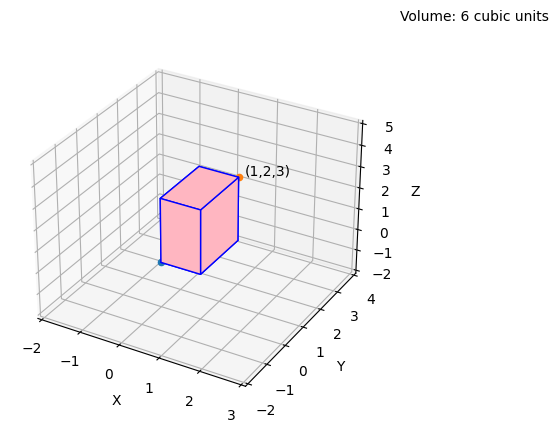

In [183]:
plot_prism(Prism(E,F))